**Cuadratura Gaussiana**

Se utilizará el método de cuadratura gaussiana para el cálculo de esta integral impropia:

\begin{align}
\int_0^\infty {\rm{d}}t e^{t^{2}}
\end{align}

Para esto se utilizarán los conceptos de polinomios de Legendre y además el método de sustitución donde:

\begin{align}
z = \frac{t}{1+t}
\end{align}

Para la que la integral quedaría tal que:

\begin{align}
\int_0^1  e^{(\frac{z}{1-z})^{2}} (\frac{1}{(1-z)^{2}}){\rm{d}}z
\end{align}

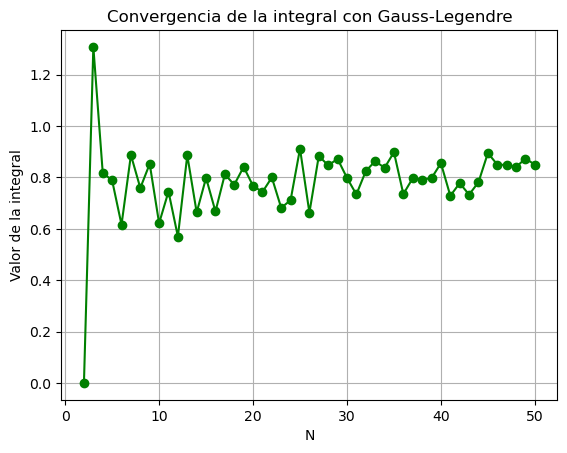

In [1]:
#Se importan las librerías
import numpy as np
import matplotlib.pyplot as plt


#La N representa el N-ésimo polinomio de Legendre
def gaussxw(N):
    #Creamos un aproximado inicial
    init_a = np.linspace(3, 4 * (N - 1), N) / ((4 * N) + 2)
    #Se define un código vectorial
    x = np.cos(np.pi * init_a + 1 / (8 * N * N * np.tan(init_a)))

    #Ahora se calculan las raíces de los polinomios utilizando a Newton de la forma:
    epsilon = 1e-15 #Genera un límite para cuando el error sea menor a este epsilon
    delta = 1.0 #Este delta tendrá que irse haciendo más pequeño hasta que la aproximación sea buena
    while delta > epsilon:
        p0 = np.ones(N, dtype = float) #Inicializa el polinomio de Legendre de orden 0 como un array lleno de unos.
        p1 = np.copy(x) #Copia profunda del array x, que representa las raíces iniciales aproximadas del polinomio.
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1) #Este bucle calcula los polinomios de Legendre usando una relación de recurrencia.
        dp = (N + 1) * (p0 - x * p1) / (1 - x * x) #Calcula la derivada de los polinomios de Legendre evaluados en x.
        dx = p1 / dp #Determina el cambio que debe aplicarse a x usando el método de Newton 
        x -= dx #Actualiza las raíces aproximadas en x restando la corrección dx.
        delta = np.max(np.abs(dx)) #Calcula el máximo cambio absoluto entre las aproximaciones sucesivas.

    # Ahora calculamos los pesos
    w = 2 * (N + 1) * (N + 1)/(N * N * (1 - x * x) * dp * dp) 

    return x,w #Devuelve los pesos y puntos de colocación

#Se define un integrando tal que:
def integrando(x):
    return np.exp(-(x/(1-x))**2) * (1 / (1-x)**2)

def gaussxwab(x_inf_ver, x_sup_ver, x, w): #'Estira' el espacio de los polinomios con una escala basada en una función constante
    return 0.5 * (x_sup_ver - x_inf_ver) * x + 0.5 * (x_sup_ver + x_inf_ver), 0.5 * (x_sup_ver - x_inf_ver) * w

N = 2
N_values = []
Int_values = []

while N <= 50:
    # Obtener los puntos y pesos de Gauss-Legendre
    x_no_esc, w_no_esc = gaussxw(N)
    # Escalar los puntos y pesos al intervalo [a, b]
    x_inf_ver, x_sup_ver = 0, 1  # Intervalo de integración
    x_Escalado, w_Escalado = gaussxwab(x_inf_ver, x_sup_ver, x_no_esc, w_no_esc)
    # Calcular la integral
    Int_current = np.sum(w_Escalado * integrando(x_Escalado))
    # Almacenar valores para graficar
    N_values.append(N)
    Int_values.append(Int_current)
    # Incrementar N 
    N += 1
plt.figure(dpi=100)
plt.plot(N_values, Int_values, marker='o', linestyle='-', color='g')
plt.grid()
plt.xlabel("N")
plt.ylabel("Valor de la integral")
plt.title("Convergencia de la integral con Gauss-Legendre")
plt.show()
